#Projeto De Sistemas Inteligentes:  K-Means
> Grupo: Rafael dos Reis de Labio (rrl3), Pedro César Guimarães Rodrigues (pcgr),Lucas Gabriel Ferreira Lima (lgfl),Vinícius Pereira de Araujo (vpa2),João Pedro Barreto de Oliveira Lima (jpbol)



# Objetivo o projeto:

Neste projeto, usaremos algoritmos de clustering (K-Means, K-Medoids) para uma abordagem não-supervisionada em um conjunto de dados sobre universidades dos EUA. O objetivo é agrupar corretamente as duas classes: universidades públicas e universidades privadas com base nas suas características.

####  Conectando o Google Colab ao Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### import das biblíotecas necessárias

In [ ]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from math import ceil

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8, 6

#### Importando os dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SI/K-Means/College.csv')

## Análise Exploratória:

In [ ]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


##### ***Dicionário dos dados:***

- Private: Um fator com níveis Não e Sim indicando universidade particular ou pública
- Apps: Número de inscrições/aplicações recebidas
- Accept: Número de inscrições/aplicações aceitas
- Enroll: Número de novos alunos matriculados
- Top10perc: Percentual dos novos alunos nos 10% melhores do H.S. Class
- Top25perc: Percentual dos novos alunos nos 25% melhores do H.S. Class
- F.Undergrad: Número de alunos de graduação em tempo integral
- P.Undergrad: Número de alunos de graduação em meio período
- Outstate: Ensino fora do estado
- Room.Board: Custos de hospedagem e alimentação
- Books: Custos estimados de livros
- Personal: Estimativa de gastos pessoais
- PhD: Pct. do corpo docente com Ph.D.
- Terminal: porcentagem do corpo docente com grau terminal (maior titulo)
- S.F.Ratio: Proporção aluno/professor
- perc.alumni: Porcentagem dos ex-alunos que doam
- Expend: Despesas com instrução por aluno
- Grad.Rate: Taxa de graduação

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

O dataframe não possui valores nulos, não sendo necessário a retirada de valores 'NaN

In [ ]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


Precisaremos remover as taxas de graduação com valores maiores que 100%

In [ ]:
df = df.drop(df[df['PhD'] > 100].index)
df = df.drop(df[df['Grad.Rate'] > 100].index)
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,3003.738065,2018.963871,780.992258,27.589677,55.834839,3706.596129,857.317419,10449.233548,4358.498065,549.250323,1342.618065,72.686452,79.734194,14.085161,22.756129,9666.891613,65.424516
std,3874.059459,2453.129603,930.130671,17.649382,19.813695,4854.888544,1523.874315,4023.024844,1097.076543,165.298459,676.813950,16.210853,14.691366,3.961664,12.405035,5226.728607,17.076789
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.000000
25%,778.000000,605.500000,242.000000,15.000000,41.000000,990.000000,95.000000,7332.000000,3597.500000,469.000000,870.000000,62.000000,71.000000,11.500000,13.000000,6754.000000,53.000000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1708.000000,355.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8408.000000,65.000000
75%,3610.000000,2413.000000,902.500000,35.000000,69.000000,4055.500000,967.500000,12937.500000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10847.000000,78.000000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,100.000000,100.000000,39.800000,64.000000,56233.000000,100.000000


### Matriz de correlação

<ipython-input-11-6219f91de5e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

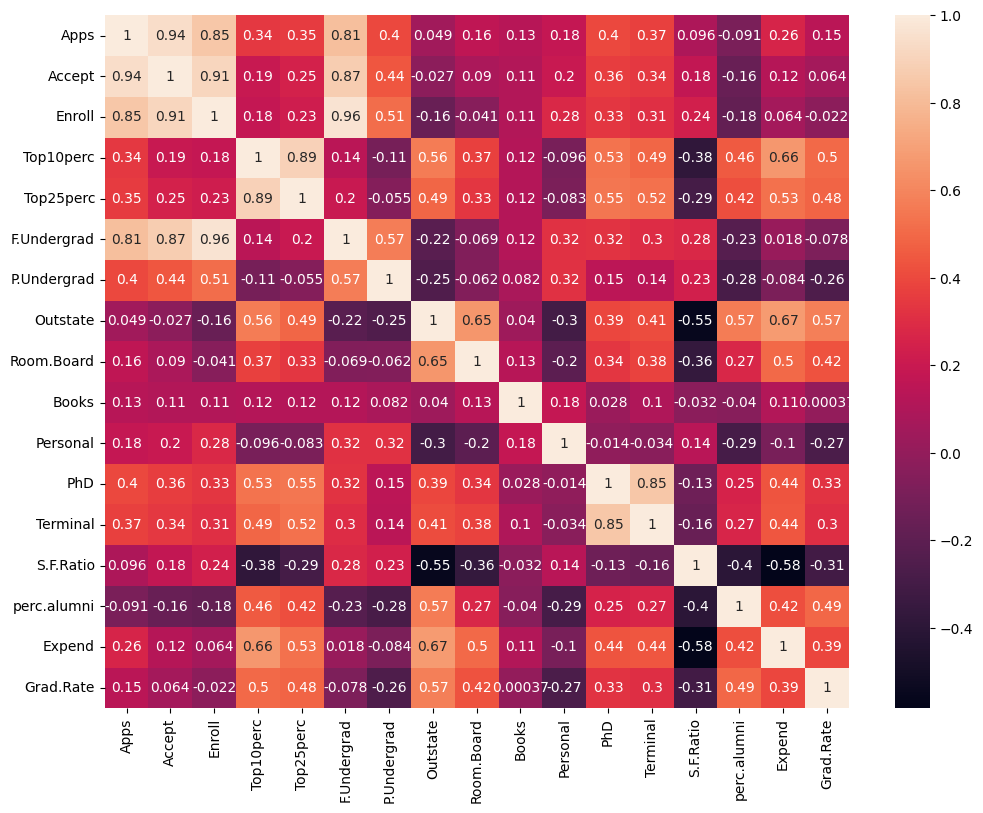

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True)

Algumas variáveis, como: 'Apps' e 'Accept', 'Enroll' e 'Accept', 'Enroll' e 'F. Undergrad', logicamente, tem uma forte correlação, já que todas tangenciam a relação de novos alunos e a faculdade.

## Pré-processamento

Ajustando a variável categórica "Private" para de Yes ou No para 1 ou 0:

In [ ]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [ ]:
df['Cluster'] = df['Private'].apply(converter)

### Normalização
Estamos realizando a normalização dos dados do conjunto de dados, uma vez que algoritmos de clusterização dependem da distância entre os pontos de dados para definir os clusters. Esses algoritmos são particularmente sensíveis a dados que possuem valores extremamente distintos em suas características. Quando as escalas das características dos dados são muito diferentes, as distâncias calculadas podem ser dominadas pelas características com os maiores valores absolutos, o que pode afetar negativamente o desempenho do algoritmo."

Redimensionamos as colunas para valores entre 0 e 1.

In [ ]:
from sklearn import preprocessing
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df.drop(columns = ['Unnamed: 0', 'Private']))
df_numeric_scaled = pd.DataFrame(minmax_processed, index = df.index, columns=df.drop(columns = ['Unnamed: 0', 'Private']).columns)
df_numeric_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.673913,0.710526,0.418231,0.187500,0.072671,0.555556,1.0
1,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.228261,0.078947,0.260054,0.250000,0.138387,0.511111,1.0
2,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.489130,0.552632,0.278820,0.468750,0.104605,0.488889,1.0
3,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.913043,0.960526,0.139410,0.578125,0.298415,0.544444,1.0
4,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.739130,0.631579,0.252011,0.031250,0.145833,0.055556,1.0


####  Definindo a matriz de atributos e o vetor target:
Removeremos a coluna "Cluster" para que possamos tratar o problema de forma não-supervisionada.

In [ ]:
X = df_numeric_scaled.drop(columns = ['Cluster'])
y = df_numeric_scaled['Cluster']

## Encontrando o melhor valor para K através de diversos métodos:

### **Elbow Method:**

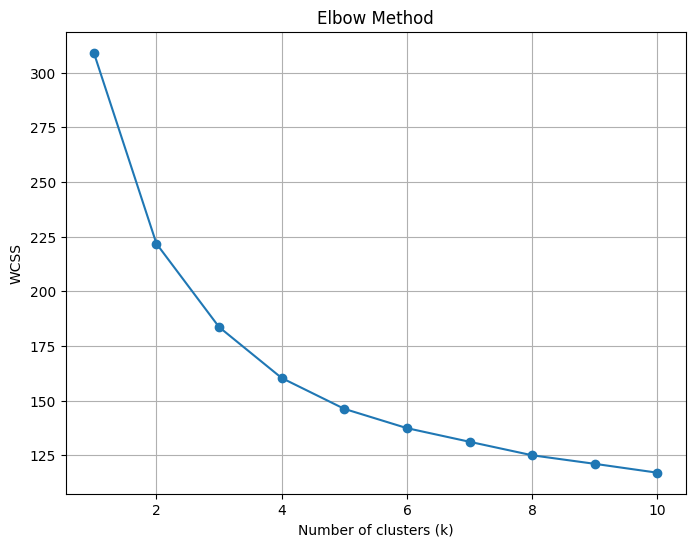

In [ ]:
wcss = []

# Try values of k from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    # Append the WCSS for this k to the list
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.grid(True)
plt.show()

O método do cotovelo (elbow method) é uma técnica utilizada para determinar o número ideal de clusters no algoritmo de k-means. Nesse método, plotamos um gráfico da variância explicada em relação ao número de clusters, e o ponto em que a curva começa a apresentar uma diminuição mais suave é o ponto de "cotovelo", que indica o número ideal de clusters.

Para esse caso, conseguimos enxergar o **K=4**.

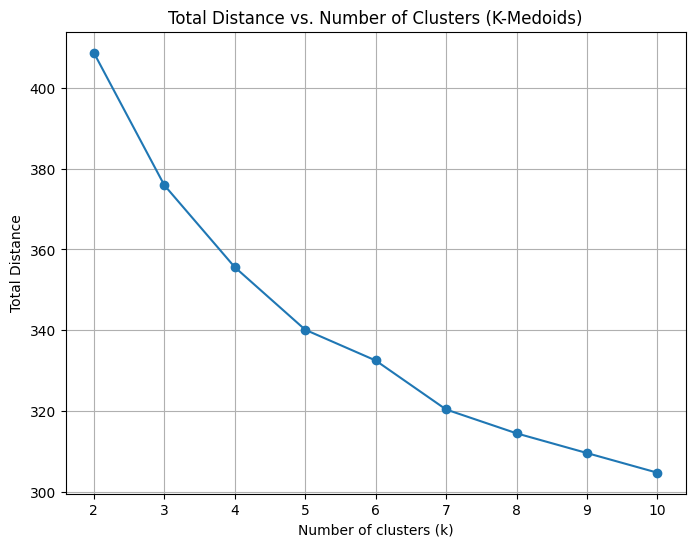

In [ ]:
total_distances = []

# Try values of k from 2 to 10 (K-Medoids requires at least 2 clusters)
for k in range(2, 11):
    kmedoids = KMedoids(n_clusters=k, random_state=0, method='pam')
    kmedoids.fit(X)

    # Append the total distance (cost) for this k
    total_distance = kmedoids.inertia_
    total_distances.append(total_distance)

# Plot the Total Distance graph (Elbow Method)
plt.plot(range(2, 11), total_distances, marker='o')
plt.title('Total Distance vs. Number of Clusters (K-Medoids)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Total Distance')
plt.grid(True)
plt.show()

Para o K-Medoids: **k=5**

### **Calinski-Harabasz Score**

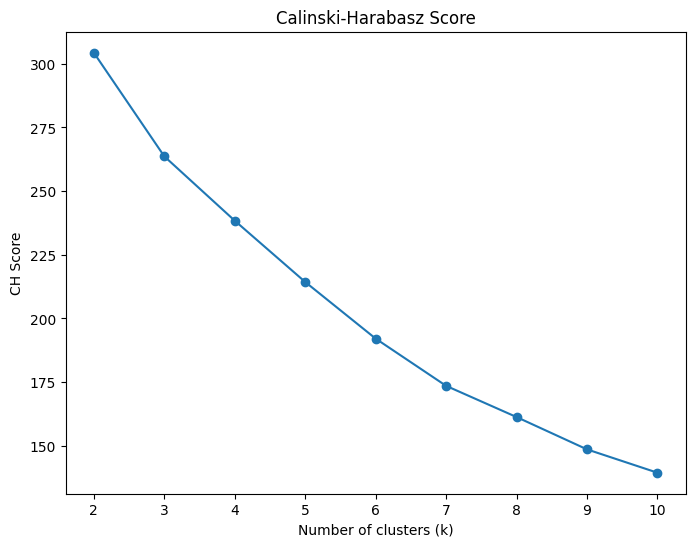

In [ ]:
from sklearn.metrics import calinski_harabasz_score
ch_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    ch_score = calinski_harabasz_score(X, kmeans.labels_)
    ch_scores.append(ch_score)

# Plot the CH scores
plt.plot(range(2, 11), ch_scores, marker='o')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('CH Score')
plt.show()

A pontuação é definida como a razão entre a soma da dispersão entre clusters e a dispersão dentro dos clusters. Quanto maior o índice de Calinski-Harabasz, melhor essa relação (Menor intra-cluster e Maior inter-cluster).

Em **K=2** obtivemos o maior valor para K-Means

In [ ]:
results = {}

for i in range(2,11):
    kmedoids = KMedoids(n_clusters=i, random_state=30)
    labels = kmedoids.fit_predict(X)
    db_index = calinski_harabasz_score(X, labels)
    results.update({i: db_index})

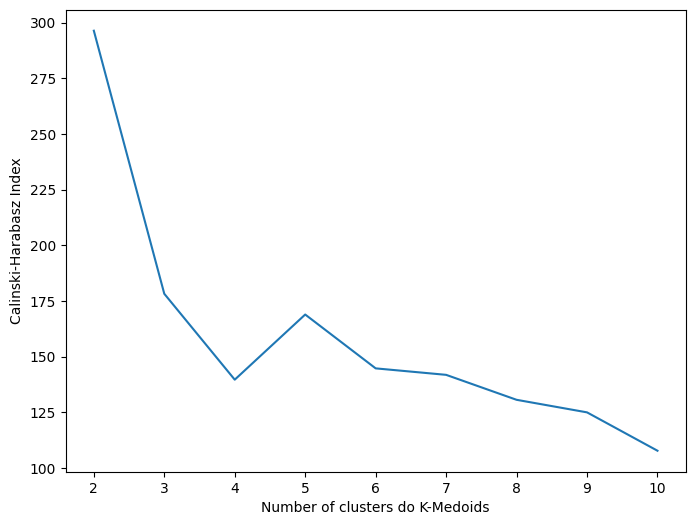

In [ ]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters do K-Medoids")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

Em K-Medoids: **K=2**

### **Davies Bouldin Score:**
Ele funciona medindo a similaridade média entre cada cluster e seu cluster mais similar (ou seja, mais "próximo"), ao mesmo tempo em que considera a dissimilaridade média dentro de cada cluster. Um valor menor no Índice de Davies-Bouldin indica agrupamentos mais bem definidos e separados.

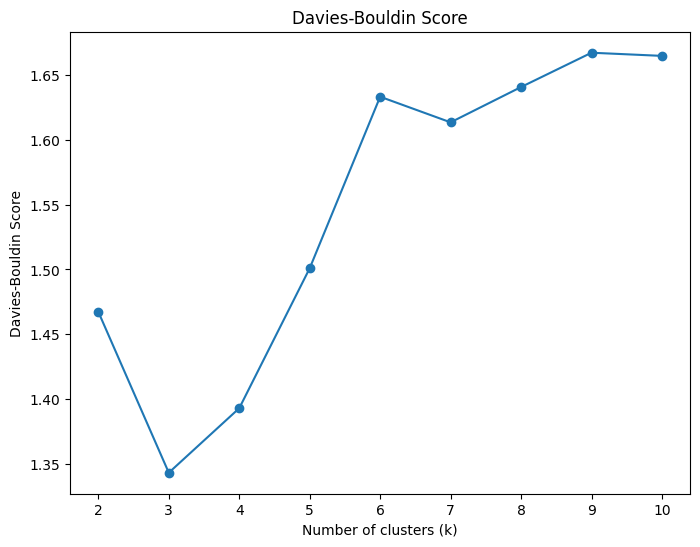

In [ ]:
from sklearn.metrics import davies_bouldin_score
db_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    db_score = davies_bouldin_score(X, kmeans.labels_)
    db_scores.append(db_score)

# Plot the Davies-Bouldin scores
plt.plot(range(2, 11), db_scores, marker='o')
plt.title('Davies-Bouldin Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.show()

O número ideal de clusters é aquele que minimiza o valor do índice de Davies-Bouldin. Isso significa que um valor menor do índice indica um melhor agrupamento. Ou seja, **K=3**.

In [ ]:
results = {}

for i in range(2,11):
    kmedoids = KMedoids(n_clusters=i, random_state=30)
    labels = kmedoids.fit_predict(X)
    db_index = davies_bouldin_score(X, labels)
    results.update({i: db_index})

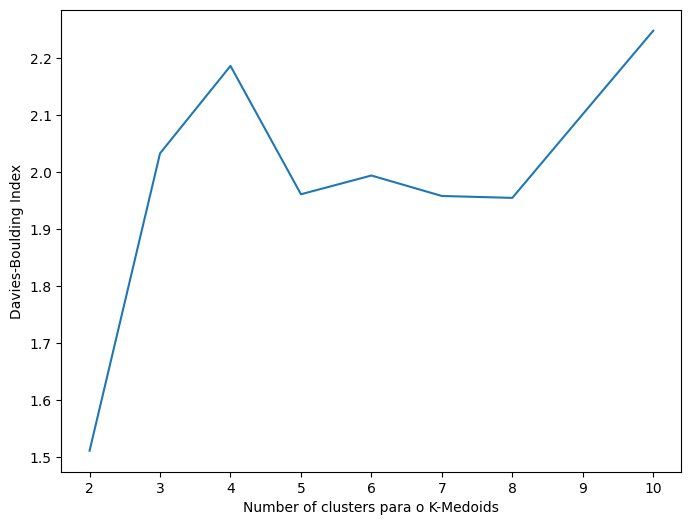

In [ ]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters para o K-Medoids")
plt.ylabel("Davies-Boulding Index")
plt.show()

Para o K-Medoids: **K=2**

### **Silhouette Method:**

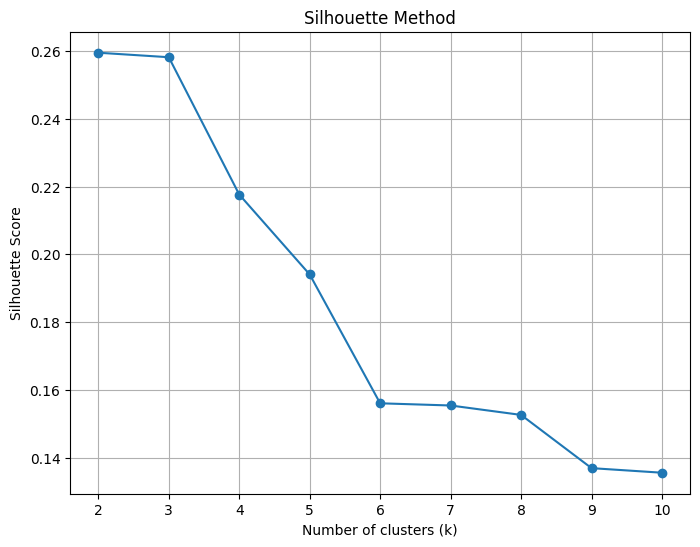

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Try values of k from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X)

    # Calculate the silhouette score for this k
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


A análise de silhueta é uma ferramenta usada para avaliar visualmente o número de clusters em um conjunto de dados. Ela mede o quão próximos os pontos estão de outros pontos em seu próprio cluster em comparação com os clusters vizinhos. Os valores da silhueta variam de -1 a 1, onde próximos de +1 indicam uma boa separação entre clusters, próximos de 0 indicam pontos na fronteira entre clusters e valores negativos indicam atribuições incorretas aos clusters.

Observando os gráficos que maximizam o valor médio da silhueta, temos que **K=2** e **K=3** são bons resultados.

For k=2, the average silhouette score is: 0.2453587370835508
For k=3, the average silhouette score is: 0.23136186806664583
For k=4, the average silhouette score is: 0.16911496416980767
For k=5, the average silhouette score is: 0.1561506762397725
For k=6, the average silhouette score is: 0.13059053994961148
For k=7, the average silhouette score is: 0.1291397662244955
For k=8, the average silhouette score is: 0.11162609736265215
For k=9, the average silhouette score is: 0.12042030071980134
For k=10, the average silhouette score is: 0.10302186100137581


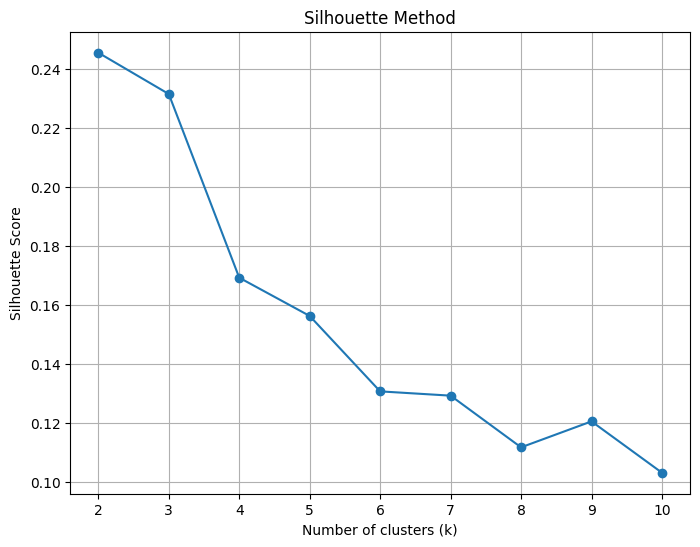

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

silhouette_scores = []

# Try values of k from 2 to 10
for k in range(2, 11):
    kmedoids = KMedoids(n_clusters=k, random_state=0, method='pam')
    cluster_labels = kmedoids.fit_predict(X)

    # Calculate the silhouette score for this k
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

for k, score in zip(range(2,11), silhouette_scores):
    print(f"For k={k}, the average silhouette score is: {score}")

# Plot the Silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Para o K-Medoids: **K=2**

### Visualização das Silhuetas

Para n_clusters = 2 O valor médio do coeficiente de silhueta é : 0.26062534529010667
Para n_clusters = 3 O valor médio do coeficiente de silhueta é : 0.17376321880799597
Para n_clusters = 4 O valor médio do coeficiente de silhueta é : 0.2140454495542584
Para n_clusters = 5 O valor médio do coeficiente de silhueta é : 0.18962571799035252
Para n_clusters = 6 O valor médio do coeficiente de silhueta é : 0.17485601467810807
Para n_clusters = 7 O valor médio do coeficiente de silhueta é : 0.14692166436448062
Para n_clusters = 8 O valor médio do coeficiente de silhueta é : 0.15241691776866545
Para n_clusters = 9 O valor médio do coeficiente de silhueta é : 0.12955684700235856
Para n_clusters = 10 O valor médio do coeficiente de silhueta é : 0.13207824006660437


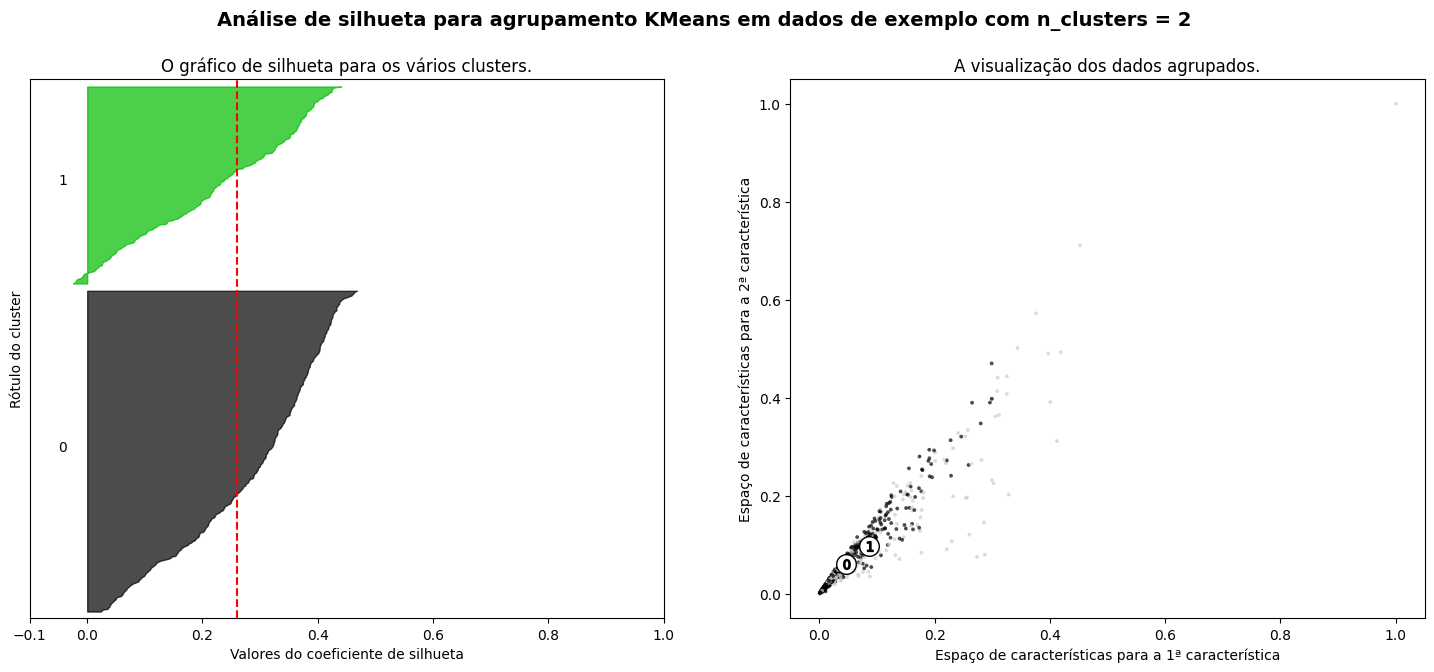

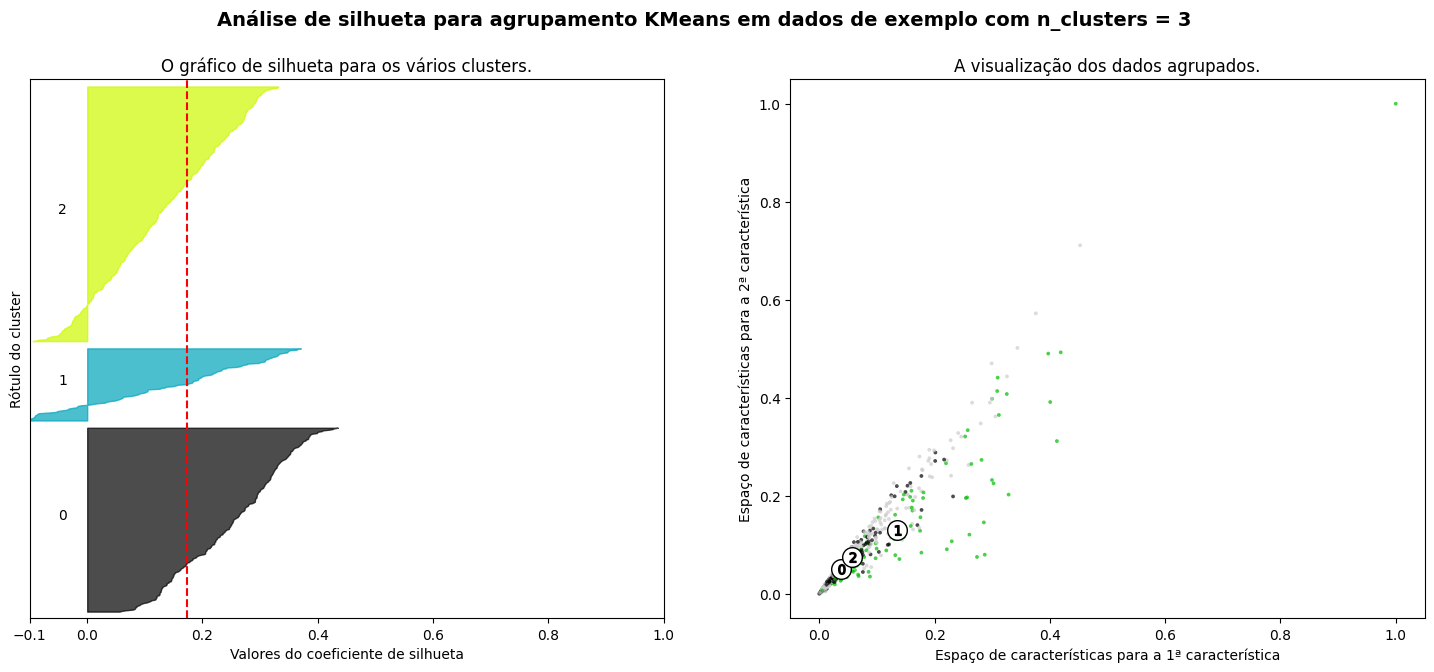

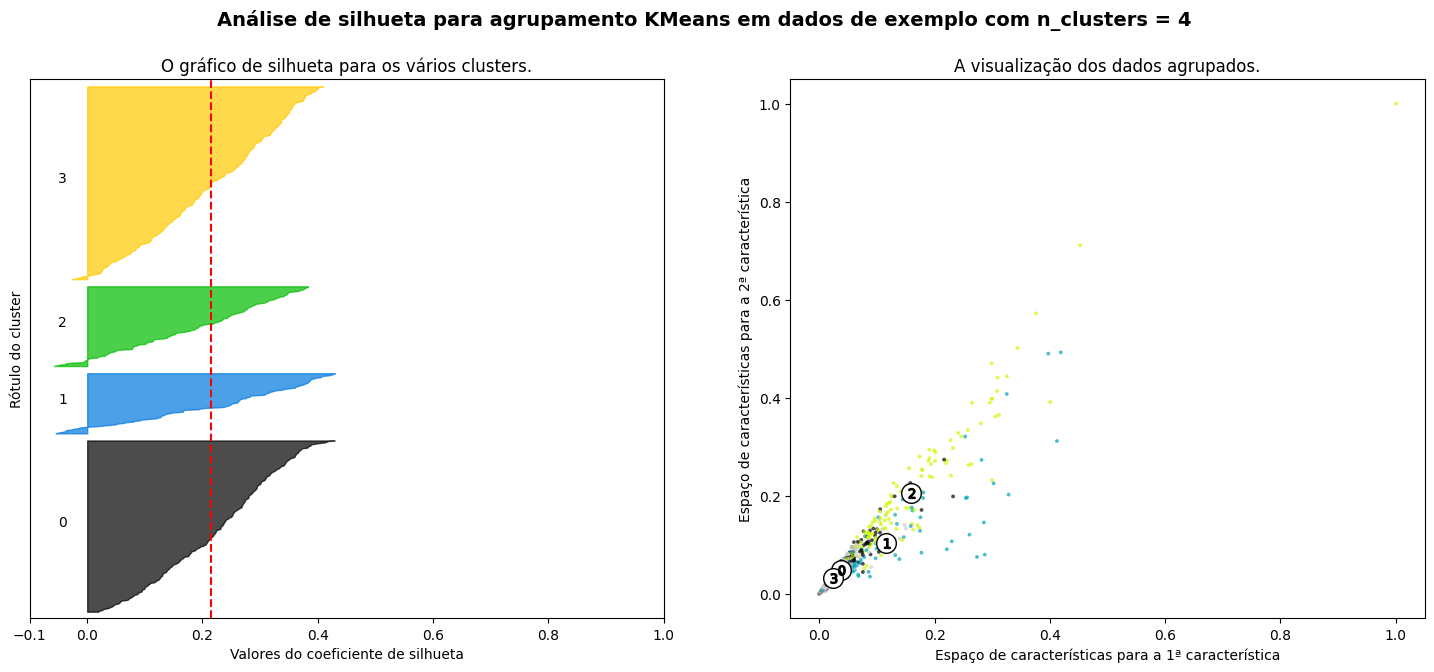

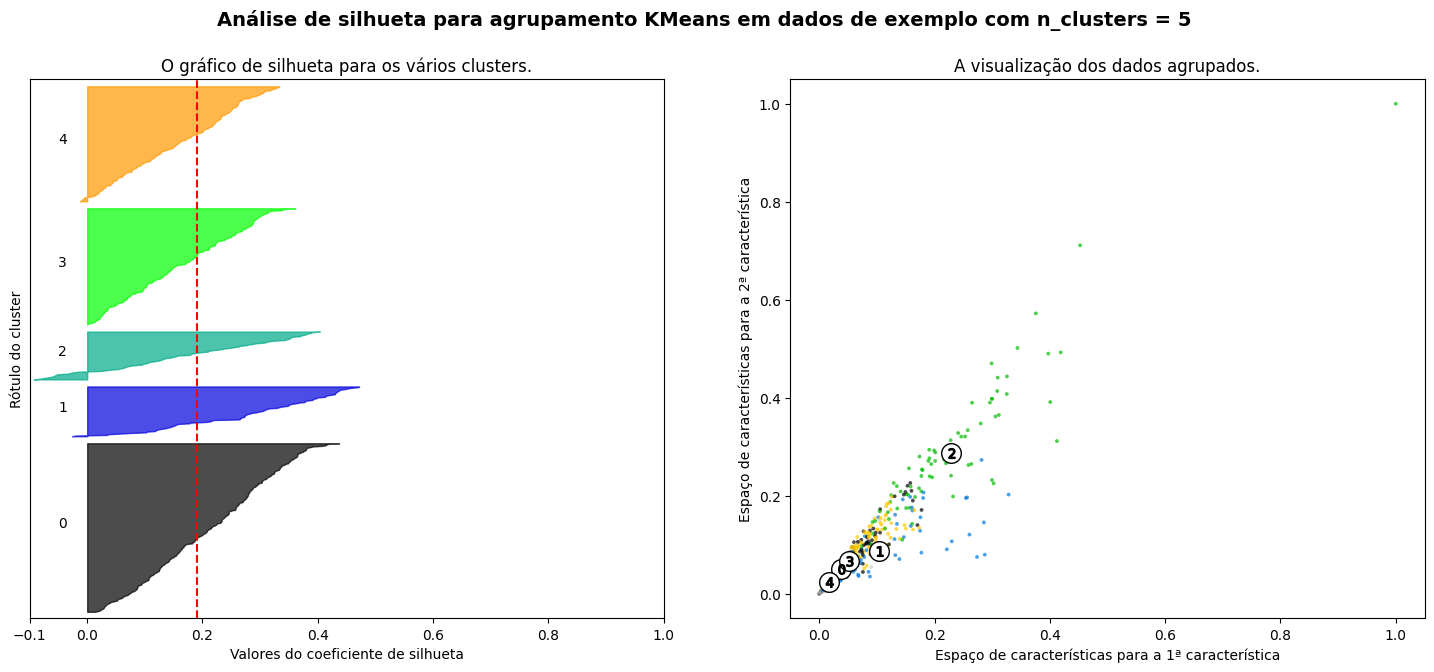

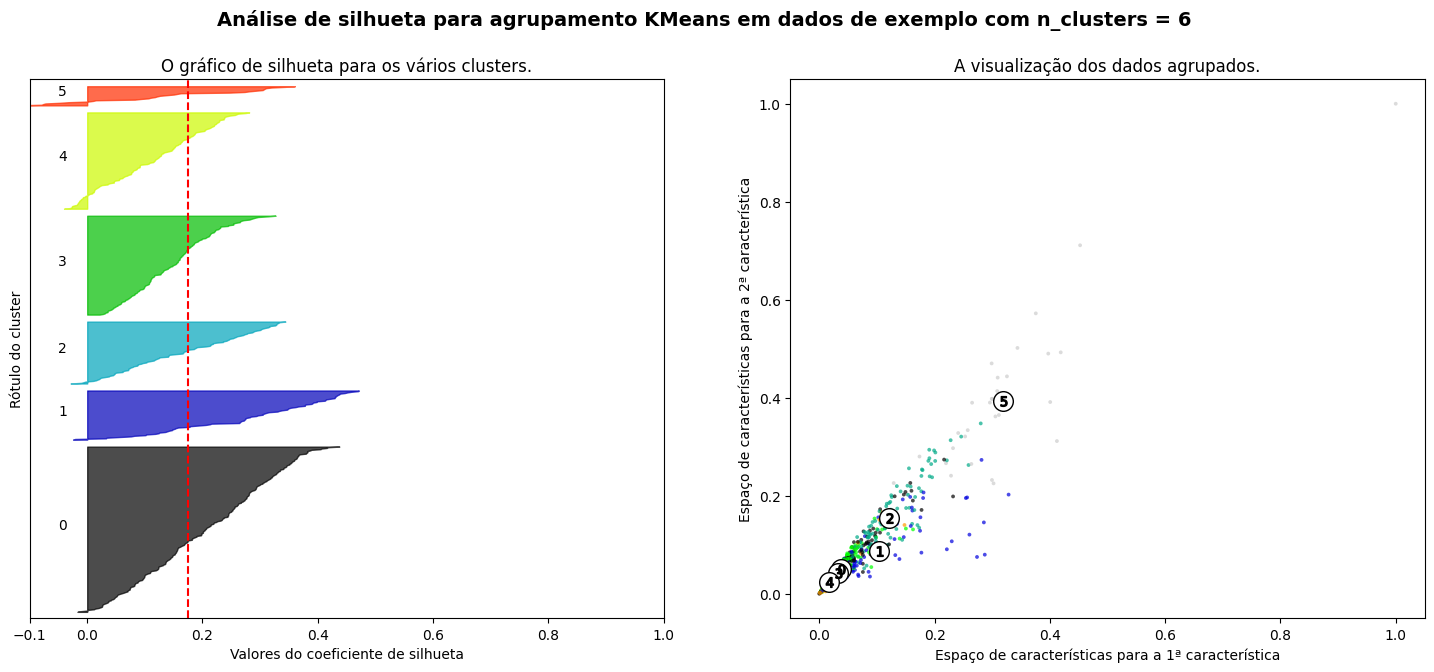

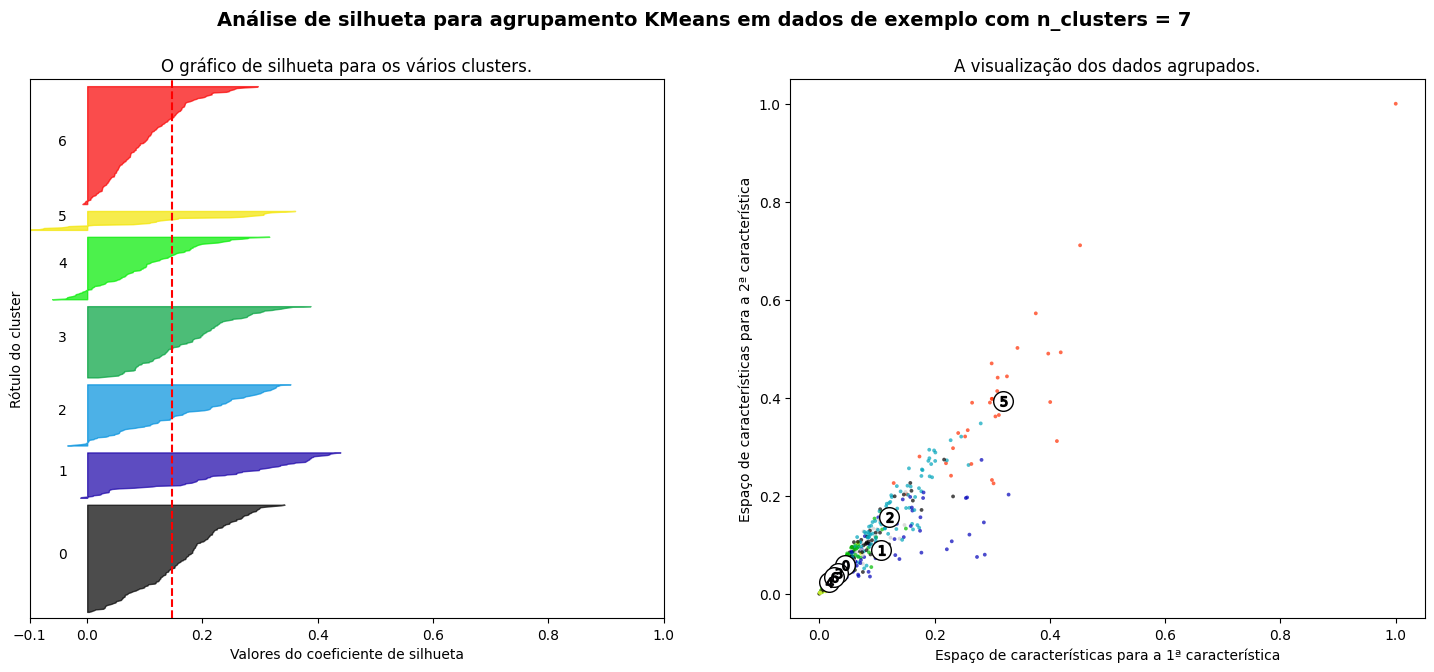

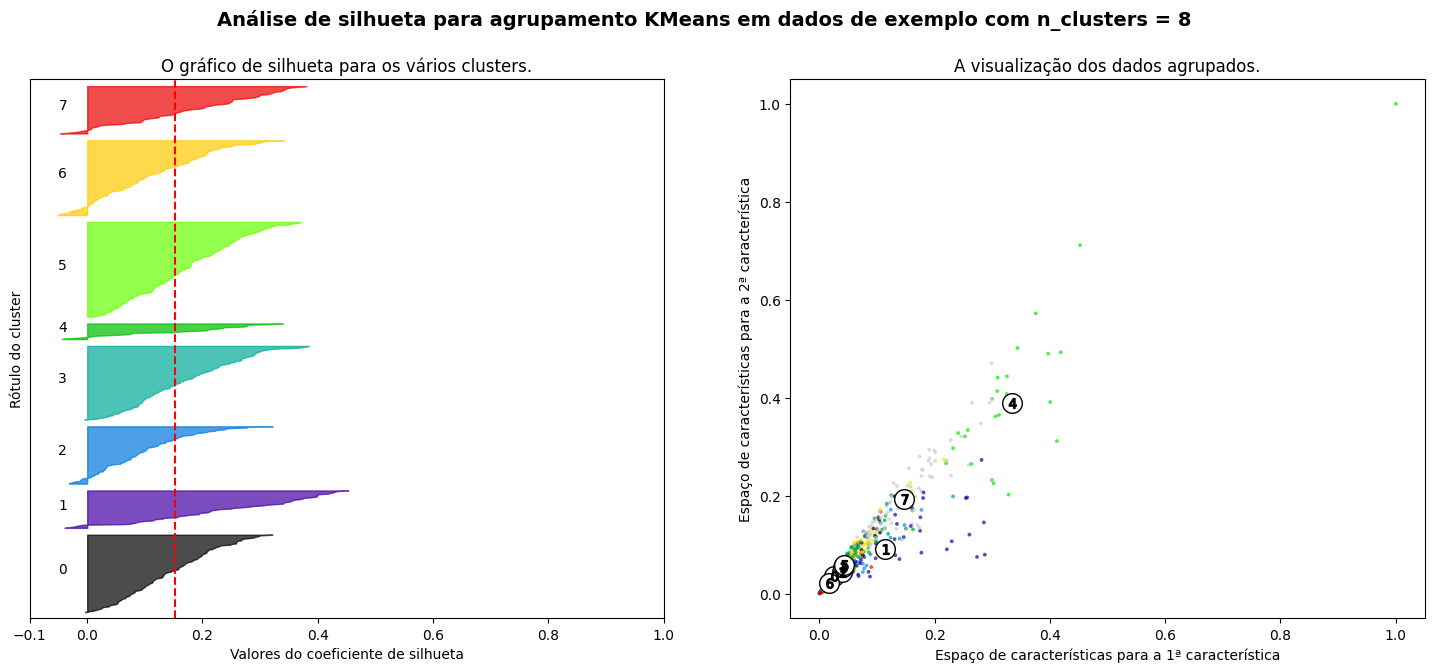

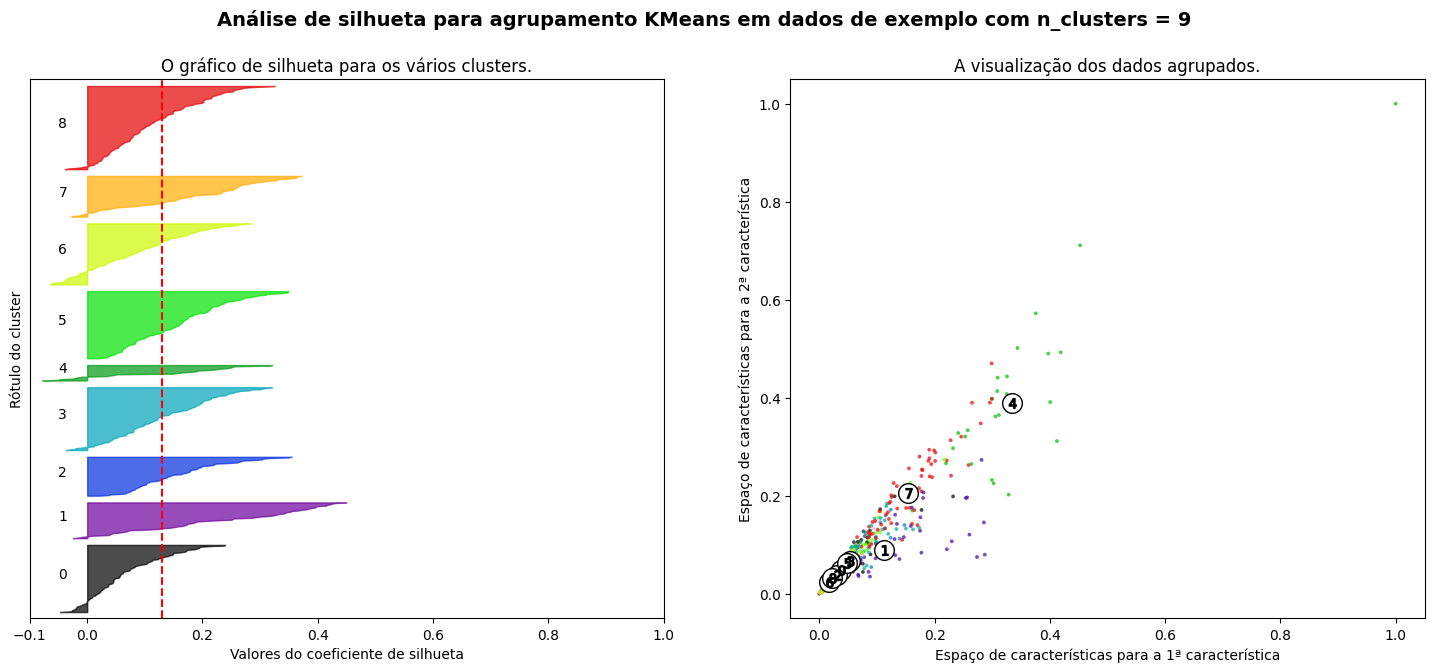

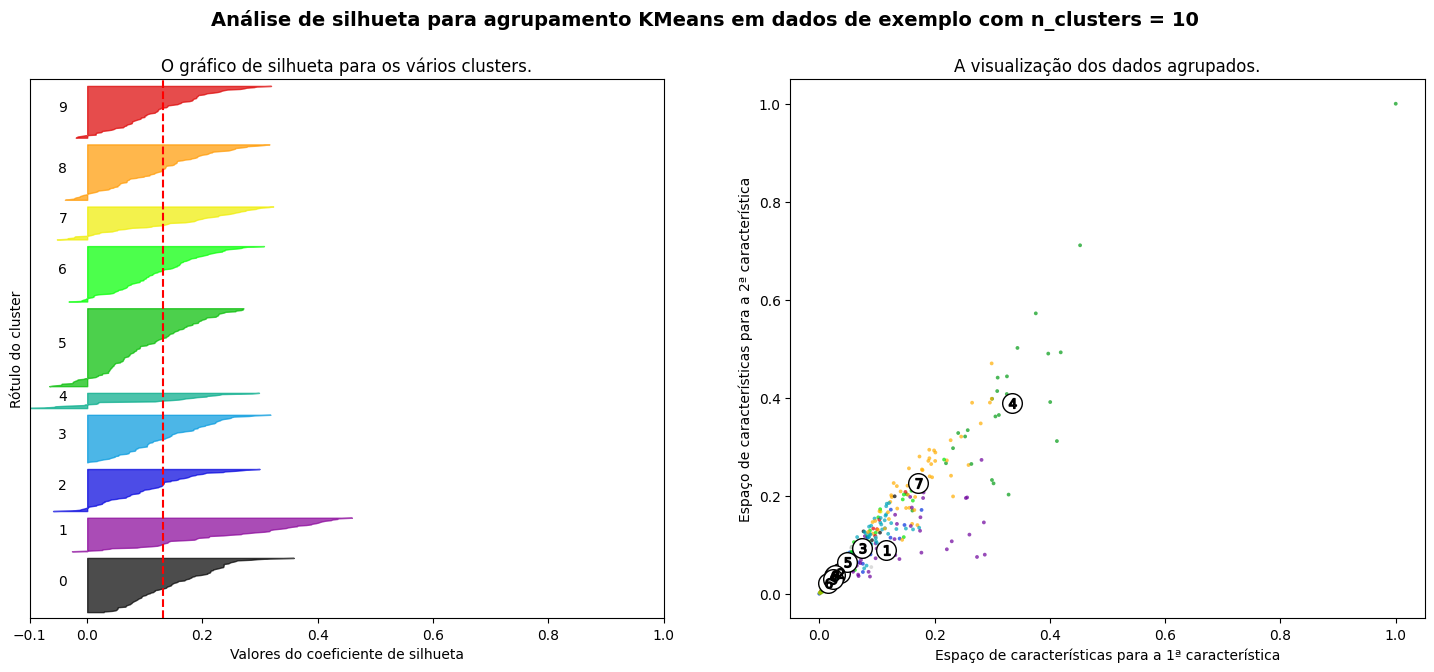

In [ ]:
X = X.to_numpy()
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    # Crie um subplot com 1 linha e 2 colunas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # O 1º subplot é o gráfico de silhueta
    # O coeficiente de silhueta pode variar de -1 a 1, mas neste exemplo todos
    # estão dentro de [-0,1, 1]
    ax1.set_xlim([-0.1, 1])
    # O (n_clusters+1)*10 é para inserir espaço em branco entre gráficos de silhueta
    # de clusters individuais, para demarcá-los claramente.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Inicialize o clusterizador com o valor n_clusters e um gerador de números aleatórios
    # com semente 10 para reprodutibilidade.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # O silhouette_score fornece o valor médio para todas as amostras.
    # Isso fornece uma perspectiva sobre a densidade e separação dos clusters formados
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "Para n_clusters =",
        n_clusters,
        "O valor médio do coeficiente de silhueta é :",
        silhouette_avg,
    )

    # Calcule os valores de silhueta para cada amostra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agregue os valores de silhueta para amostras pertencentes ao
        # cluster i, e ordene-os
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Rotule os gráficos de silhueta com os números dos clusters no meio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calcule o novo y_lower para o próximo gráfico
        y_lower = y_upper + 10  # 10 para as amostras com valor 0

    ax1.set_title("O gráfico de silhueta para os vários clusters.")
    ax1.set_xlabel("Valores do coeficiente de silhueta")
    ax1.set_ylabel("Rótulo do cluster")

    # A linha vertical para o valor médio do coeficiente de silhueta de todos os valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Limpe os rótulos/eixos y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2º Gráfico mostrando os clusters reais formados
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'cyan', 'brown', 'gray', 'olive']

    ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=cluster_labels, cmap='nipy_spectral', edgecolor="k"
)

    # Rotulando os clusters
    centers = clusterer.cluster_centers_
    # Desenhe círculos brancos nos centros dos clusters
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("A visualização dos dados agrupados.")
    ax2.set_xlabel("Espaço de características para a 1ª característica")
    ax2.set_ylabel("Espaço de características para a 2ª característica")

    plt.suptitle(
        "Análise de silhueta para agrupamento KMeans em dados de exemplo com n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


### **BIC:**

In [ ]:
k_values = range(2, 10)

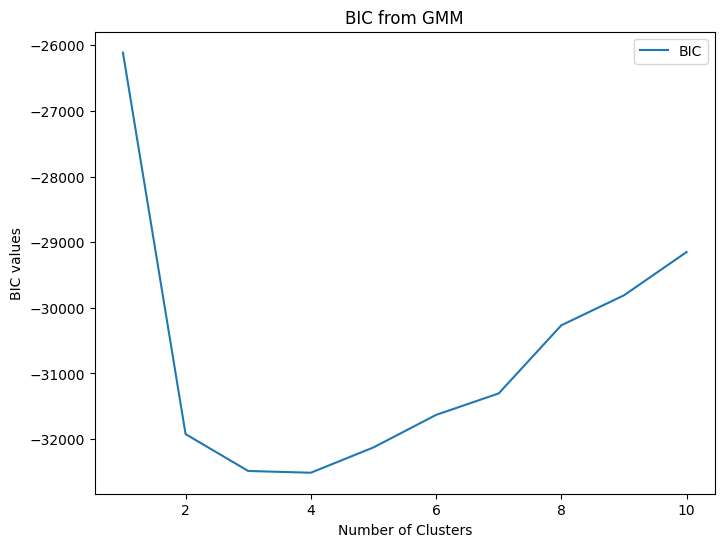

In [ ]:
from sklearn.mixture import GaussianMixture

# Criar dicionário vazio para valores BIC
bic_score = {}
# Loop pelo numero de clusters
for i in range(1,11):
  # Create Gaussian Mixture Model
  gmm = GaussianMixture(n_components=i, random_state=0).fit(X)
  # Get BIC score for the model
  bic_score[i] = gmm.bic(X)

# Graficos
plt.figure(figsize=(8,6))
plt.plot(list(bic_score.keys()),list(bic_score.values()), label='BIC')
plt.legend(loc='best')
plt.title('BIC from GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC values')
plt.show()

O BIC é baseado no cálculo da função de verossimilhança do modelo, que mede a probabilidade de observar os dados para um determinado modelo e um determinado número de clusters. O BIC leva em conta a complexidade do modelo, que é medida pelo número de parâmetros do modelo e pela quantidade de dados disponíveis, para determinar qual é o número ideal de clusters.

O BIC é definido pela seguinte fórmula:

BIC = -2 * log(L) + k * log(n)

No critério de informação bayesiano (BIC), quanto menor o valor, melhor é o modelo. Então, **K=3**.



**Ao analisar os resultados de cada método e alguns comportamentos das variáveis do nosso dataset, decidimos usar K=3 para o K-Means e o K-Medoids.**

##  Treinando:

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

- A distância intracluster mede a semelhança entre os elementos dentro de cada cluster. É calculada como a média das distâncias entre todos os pares de elementos pertencentes ao mesmo cluster. Uma distância intracluster menor indica que os elementos dentro de um cluster são mais semelhantes entre si e que o agrupamento é mais homogêneo.

- A distância intercluster mede a dissimilaridade entre os clusters. É calculada como a distância média entre todos os pares de elementos pertencentes a clusters diferentes. Uma distância intercluster maior indica que os clusters são mais diferentes entre si e que o agrupamento é mais heterogêneo.

Uma boa clusterização deve apresentar uma distância intracluster pequena e uma distância intercluster grande, indicando que os elementos dentro de cada cluster são mais semelhantes entre si do que com os elementos de outros clusters.

## Resultados

### Calculando distâncias intra-cluster do K-Means e K-Medoids:

In [ ]:
# Importar as bibliotecas necessárias
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import cdist

# Executar o K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

# Executar o K-Medoids com 3 clusters
kmedoids = KMedoids(n_clusters=3, random_state=42).fit(X)

# Obter os centróides e rótulos dos clusters para o K-Means
centroids_kmeans = kmeans.cluster_centers_
labels_kmeans = kmeans.labels_

# Calcular a distância intra-cluster
distancias_intra_cluster = []
for i in range(kmeans.n_clusters):
    pontos_do_cluster = X[labels_kmeans == i]
    centroide = centroids_kmeans[i]
    distancias = cdist(pontos_do_cluster, [centroide])
    print(i, np.mean(distancias))
    distancias_intra_cluster.append(np.mean(distancias))

distancia_intra_cluster_media = np.mean(distancias_intra_cluster)

print("Distância intra-cluster média para o K-Means:", distancia_intra_cluster_media) # Printa resultado K-Means

# Obter os centróides e rótulos dos clusters para o K-Medoids
centroids_kmedoids = kmedoids.cluster_centers_
labels_kmedoids = kmedoids.labels_

# Calcular a distância intra-cluster
distancias_intra_cluster = []
for i in range(kmedoids.n_clusters):
    pontos_do_cluster = X[labels_kmedoids == i]
    centroide = centroids_kmedoids[i]
    distancias = cdist(pontos_do_cluster, [centroide])
    print(i, np.mean(distancias))
    distancias_intra_cluster.append(np.mean(distancias))

distancia_intra_cluster_media = np.mean(distancias_intra_cluster)

print("Distância intra-cluster média para o K-Medoids:", distancia_intra_cluster_media) # Printa resultado K-Medoids


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0 0.4406391658250023
1 0.4624101127650981
2 0.512198949315912
Distância intra-cluster média para o K-Means: 0.4717494093020041
0 0.4148239425263173
1 0.48997359291260184
2 0.6078942075080236
Distância intra-cluster média para o K-Medoids: 0.5042305809823143


Podemos observar que o K-means tem uma distância intracluster menor e uma distância intercluster maior. Sendo assim, concluímos que ele possui o melhor desempenho.

#### Visualizando os clusters através de análise PCA

In [ ]:
from sklearn.decomposition import PCA

Usamos PCA (Principal Component Analysis) para visualizar clusters resultantes de um k-algoritmo de clustering em um dataset n-dimensional porque o PCA pode reduzir a dimensionalidade do conjunto de dados, projetando-o em um espaço de dimensão menor que preserva a maior parte da variabilidade dos dados originais.

O PCA é uma técnica útil para visualizar clusters em um espaço de dimensão reduzida, facilitando a interpretação dos resultados do k-means. Além disso, o PCA ajuda a identificar as variáveis mais importantes para a separação dos clusters, o que pode ser útil para entender as características dos dados e a interpretação dos resultados.

Para o K-Means:

In [ ]:
k_means3 = KMeans(n_clusters=3)
pca=PCA(n_components=2)
principalComponents = pca.fit_transform(df_numeric_scaled)
PCA_components = pd.DataFrame(principalComponents)
X_clustered = k_means3.fit_predict(PCA_components)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
Label_color_map={0:'r',1:'g', 2:'b'}
label_color=[Label_color_map[i] for i in X_clustered]

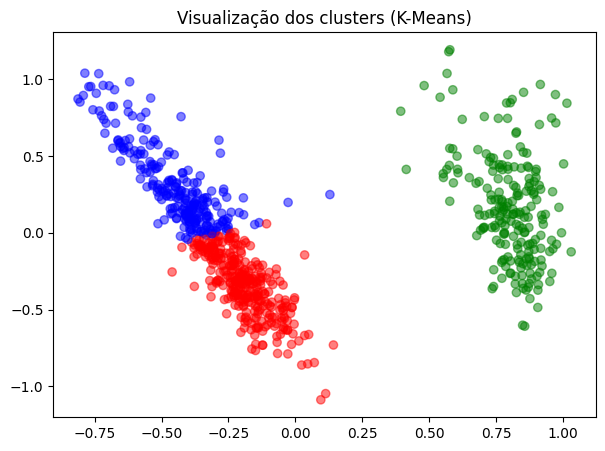

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=label_color,alpha=0.5)
plt.title('Visualização dos clusters (K-Means)')

plt.show()

Para o K-Medoids:

In [ ]:
kmedoids3 = KMedoids(n_clusters=3)
pca=PCA(n_components=2)
principalComponents = pca.fit_transform(df_numeric_scaled)
PCA_components = pd.DataFrame(principalComponents)
X_clustered = kmedoids3.fit_predict(PCA_components)

In [ ]:
Label_color_map={0:'r',1:'g', 2:'b'}
label_color=[Label_color_map[i] for i in X_clustered]

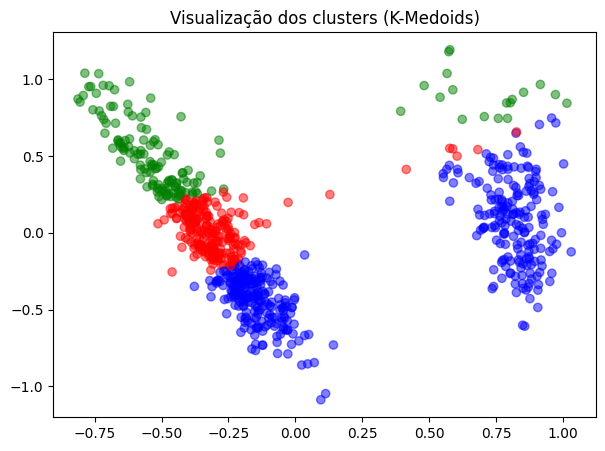

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=label_color,alpha=0.5)
plt.title('Visualização dos clusters (K-Medoids)')

plt.show()

Podemos concluir que existem características que são compartilhadas entre universidades públicas e privadas, o que faz os pontos ficarem sobrepostos quando analisamos as classes em "Private", mas isso fica ainda mais evidente quando utilizamos um método não-supervisionado de agrupamento com um K diferente do número de classes que tinhamos para uma abordagem supervisionada de classificação.